In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Combine features and target into one DataFrame for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where the target variable is NaN
cleaned_data = data.dropna()

# Split the data back into features (X) and target (y)
X = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]

X, y = X.to_numpy(), y.to_numpy()

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)
print(f"Rows removed: {rows_removed}")

Rows removed: 6


In [2]:
from sklearn.model_selection import train_test_split

# Do a 70/30 split (e.g., 70% train, 30% other)
X_train, X_leftover, y_train, y_leftover = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,    # for reproducibility
    shuffle=True,       # whether to shuffle the data before splitting
)

# Split the remaining 30% into validation/testing (15%/15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_leftover, y_leftover,
    test_size=0.5,
    random_state=42,
    shuffle=True,
)

# Compute statistics for X (features)
X_mean = X_train.mean(axis=0)  # Mean of each feature
X_std = X_train.std(axis=0)    # Standard deviation of each feature

# Standardize X
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Compute statistics for y (targets)
y_mean = y_train.mean()  # Mean of target
y_std = y_train.std()    # Standard deviation of target

# Standardize y
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [3]:
from mlp import *
from utils import *
from loss_functions import *

In [4]:
l = [X_train.shape[1], 64, 32, 1]
layer1 = Layer(l[0], l[1], Sigmoid(), dropout_rate=0.1)
layer2 = Layer(l[1], l[2], Sigmoid(), dropout_rate=0.1)
layer3 = Layer(l[2], l[3], Sigmoid())


layers = [layer1, layer2, layer3]
print("Layer 1: fan in = ", l[0], ", fan out = ", l[1])
print("Layer 2: fan in = ", l[1], ", fan out = ", l[2])
print("Layer 3: fan in = ", l[2], ", fan out = ", l[3])


Layer 1: fan in =  7 , fan out =  64
Layer 2: fan in =  64 , fan out =  32
Layer 3: fan in =  32 , fan out =  1


In [5]:
y_train.shape

(274,)

In [6]:
model = MultilayerPerceptron(layers)
loss_fn = SquaredError()

In [7]:
model.layers[0].b.shape

(1, 64)

In [8]:
training_loss, val_loss = model.train(X_train, y_train.reshape(-1,1), X_val, y_val.reshape(-1,1), loss_fn, batch_size=8, epochs=1500, learning_rate=0.01)

-------------------------------------
Epoch: 0, Train Loss: 21.766343465178338, Validation Loss: 4.133845778965712
-------------------------------------
Epoch: 1, Train Loss: 20.151627346150374, Validation Loss: 3.854619547737982
-------------------------------------
Epoch: 2, Train Loss: 19.06937935364457, Validation Loss: 3.709134502394347
-------------------------------------
Epoch: 3, Train Loss: 18.676140304665665, Validation Loss: 3.628002507945359
-------------------------------------
Epoch: 4, Train Loss: 18.386627906662152, Validation Loss: 3.5741164763212643
-------------------------------------
Epoch: 5, Train Loss: 18.494353197940637, Validation Loss: 3.5353169770695727
-------------------------------------
Epoch: 6, Train Loss: 18.056514295031175, Validation Loss: 3.511683415244339
-------------------------------------
Epoch: 7, Train Loss: 17.92209433458568, Validation Loss: 3.4950666289778596
-------------------------------------
Epoch: 8, Train Loss: 17.99416603054748, 

In [9]:
import matplotlib.pyplot as plt

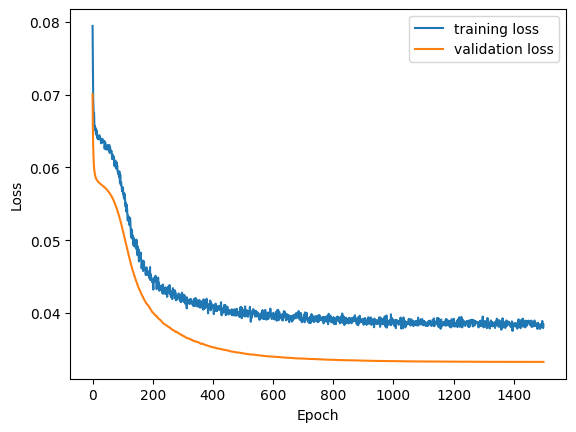

In [10]:
# plot training and validation loss
plt.plot(training_loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
a = np.random.randn(10)
a = a.reshape((2,5))
a.shape

(2, 5)

In [12]:
model.layers[0].b

array([[ 0.00535736, -0.02473141, -0.10563977, -0.01193015, -0.04166085,
        -0.01170092,  0.0038112 , -0.08898051, -0.24890821,  0.0517069 ,
         0.03698372,  0.00640598, -0.01977887,  0.07145611,  0.00148754,
         0.00038596,  0.05916145, -0.05683246,  0.00130665, -0.09316027,
        -0.0128529 , -0.06063224, -0.00440648,  0.03431474,  0.00036299,
        -0.00374527, -0.02397018, -0.0460508 ,  0.00794795, -0.00277829,
         0.05753399, -0.00396492,  0.06907811,  0.0138154 , -0.04482416,
        -0.01047015,  0.06054478,  0.00146973,  0.21949076, -0.25219351,
         0.07690527,  0.00648927, -0.11296457, -0.06519797, -0.01314559,
        -0.00372937,  0.09480683,  0.07679785,  0.24836909,  0.03512866,
        -0.00657739, -0.25474584,  0.01113449,  0.09430691,  0.02039571,
         0.03332615, -0.00359289, -0.09212282, -0.16578214,  0.07369265,
         0.2370439 , -0.1250037 ,  0.00257846, -0.00290824]])

In [13]:
model.layers[0].W.shape

(7, 64)